# Using TimeSeries for analysis i think..

In [24]:
import pandas as pd
data = pd.read_csv('Data/monthly_IBM.csv')
print(data.head(50))

     timestamp    open      high       low   close     volume
0   2024-09-17  201.91  218.8400  199.3350  214.13   44850079
1   2024-08-30  192.81  202.1700  181.8100  202.13   65453729
2   2024-07-31  173.45  196.2600  173.3800  192.14   81258646
3   2024-06-28  166.54  178.4599  163.5300  172.95   70706301
4   2024-05-31  165.69  175.4600  162.6200  166.85   78620355
5   2024-04-30  190.00  193.2800  165.2605  166.20   98297181
6   2024-03-28  185.49  199.1800  185.1800  190.96   99921776
7   2024-02-29  183.63  188.9500  178.7500  185.03   88679550
8   2024-01-31  162.83  196.9000  157.8850  183.66  128121557
9   2023-12-29  158.41  166.3400  158.0000  163.55   87358302
10  2023-11-30  145.00  158.6000  144.4500  158.56   78460252
11  2023-10-31  140.04  144.7600  135.8700  144.64   94386980
12  2023-09-29  147.26  151.9299  139.6100  140.30   82806487
13  2023-08-31  144.25  147.7275  139.7600  146.83   84274205
14  2023-07-31  133.42  144.6050  131.5500  144.18   85778938
15  2023

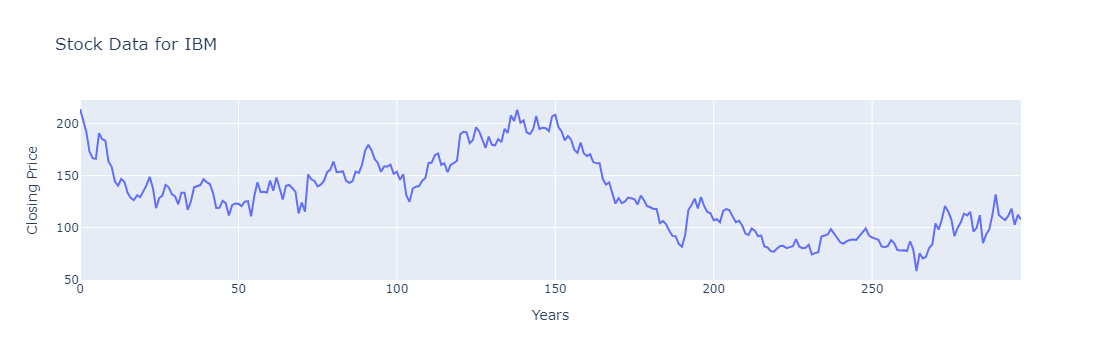

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure(data=go.Scatter(x=data.index, y=data['close']))
fig.update_layout(title=f'Stock Data for IBM',xaxis_title='Years',yaxis_title='Closing Price')
fig.show()

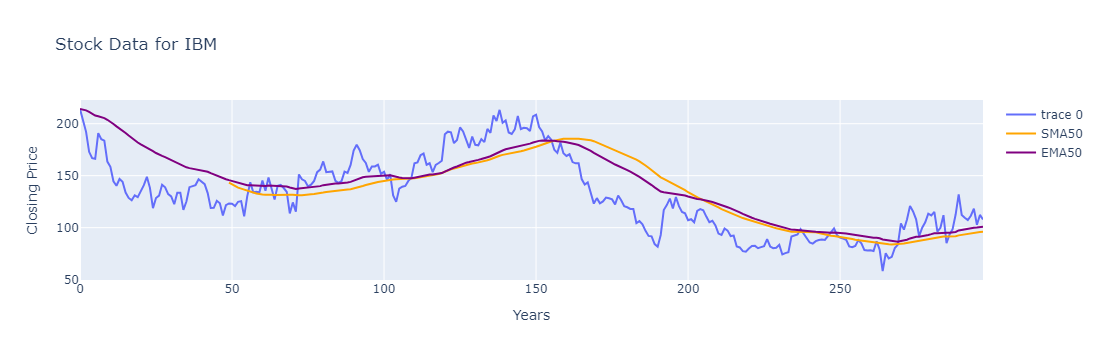

In [27]:
data['SMA50'] = data['close'].rolling(50).mean() #using closing data for SMA, comparing with 10 previous data 
data['EMA50'] = data['close'].ewm(span=50, adjust=False).mean()

fig.add_trace(go.Scatter(x=data.index, y=data['SMA50'],mode='lines',name='SMA50',line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data.index, y=data['EMA50'],mode='lines',name='EMA50',line=dict(color='purple')))


In [29]:
data['Crossings'] = 0
crossing_indices_below = (data['close'] > data['SMA50']) & (data['close'].shift(-1) < data['SMA50'].shift(-1))
crossing_indices_above = (data['close'] < data['SMA50']) & (data['close'].shift(-1) > data['SMA50'].shift(-1))
data.loc[crossing_indices_below, 'Crossings'] = -1
data.loc[crossing_indices_above, 'Crossings'] = 1

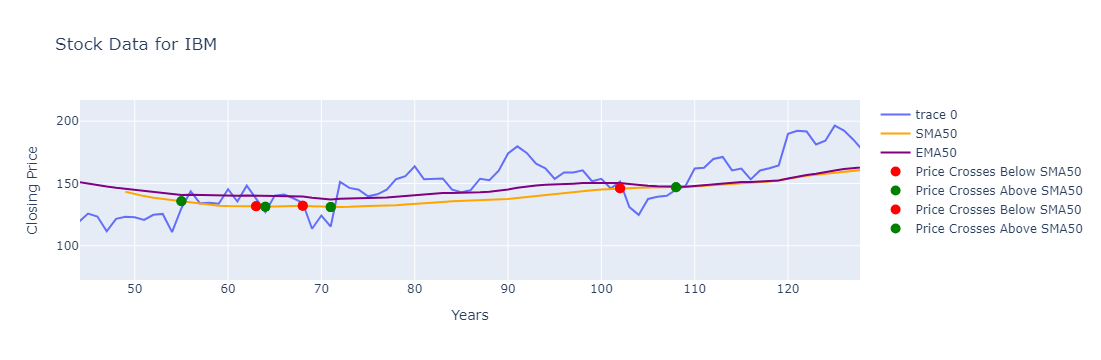

In [31]:
# crossovers indicators
fig.add_trace(go.Scatter(x=data[data['Crossings'] == -1].index, y=data[data['Crossings'] == -1]['SMA50'],
mode='markers', name='Price Crosses Below SMA50', marker=dict(color='red', size=10)))

fig.add_trace(go.Scatter(x=data[data['Crossings'] == 1].index, y=data[data['Crossings'] == 1]['SMA50'],
mode='markers', name='Price Crosses Above SMA50', marker=dict(color='green', size=10)))

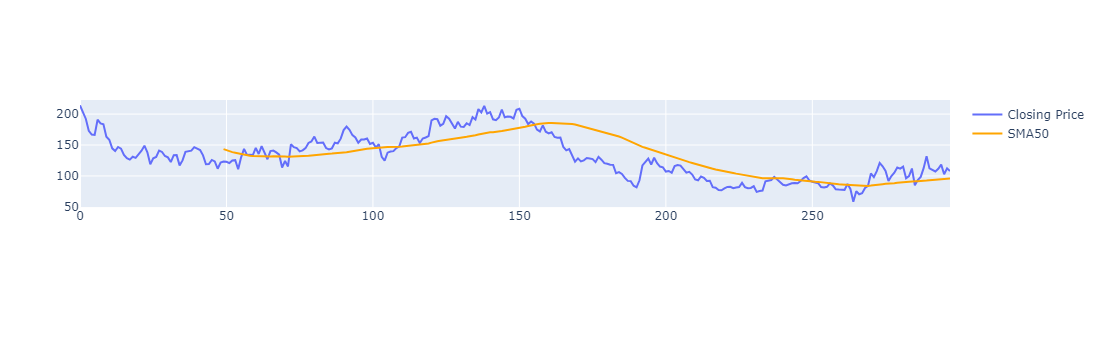

In [33]:
#Sub Plot - waana make sub plot for vol/price trend and maybe rsi as well
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3])
fig.add_trace(go.Scatter(x=data.index, y=data['close'], name="Closing Price"))
fig.add_trace(go.Scatter(x=data.index, y=data['SMA50'],mode='lines',name='SMA50',line=dict(color='orange')))

# Using TA-Lib AND Plotly

In [121]:
import pandas as pd
data = pd.read_csv('Data/monthly_IBM.csv')
print(data.head(50))

     timestamp    open      high       low   close     volume
0   2024-09-17  201.91  218.8400  199.3350  214.13   44850079
1   2024-08-30  192.81  202.1700  181.8100  202.13   65453729
2   2024-07-31  173.45  196.2600  173.3800  192.14   81258646
3   2024-06-28  166.54  178.4599  163.5300  172.95   70706301
4   2024-05-31  165.69  175.4600  162.6200  166.85   78620355
5   2024-04-30  190.00  193.2800  165.2605  166.20   98297181
6   2024-03-28  185.49  199.1800  185.1800  190.96   99921776
7   2024-02-29  183.63  188.9500  178.7500  185.03   88679550
8   2024-01-31  162.83  196.9000  157.8850  183.66  128121557
9   2023-12-29  158.41  166.3400  158.0000  163.55   87358302
10  2023-11-30  145.00  158.6000  144.4500  158.56   78460252
11  2023-10-31  140.04  144.7600  135.8700  144.64   94386980
12  2023-09-29  147.26  151.9299  139.6100  140.30   82806487
13  2023-08-31  144.25  147.7275  139.7600  146.83   84274205
14  2023-07-31  133.42  144.6050  131.5500  144.18   85778938
15  2023

In [122]:
import numpy as np
import talib
#import pandas_ta as ta

data['SMA10'] = talib.SMA(data['close'], timeperiod=10) #comparing with 50 previous data
data['EMA50'] = talib.EMA(data['close'], timeperiod=50)
data['RSI'] = talib.RSI(data['close'], timeperiod=20)
#ta.supertrend(data['high'], data['low'], data['close'], append=True, length=14, multiplier=3) #try to concatenate the cols 

##print(sti)

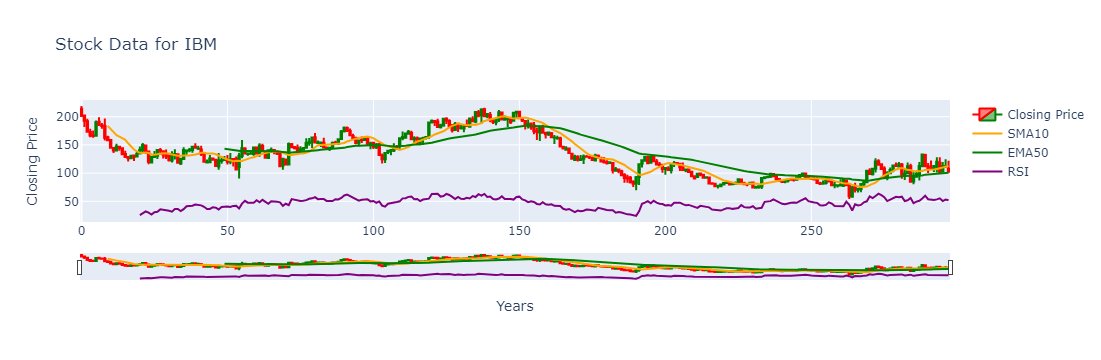

In [125]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'],
                increasing_line_color = "red",
                decreasing_line_color = "green",
                name="Closing Price")])


fig.add_trace(go.Scatter(x=data.index, y=data['SMA10'],mode='lines',name='SMA10',line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data.index, y=data['EMA50'],mode='lines',name='EMA50',line=dict(color='green')))
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'],mode='lines',name='RSI',line=dict(color='purple')))
fig.update_layout(title=f'Stock Data for IBM',xaxis_title='Years',yaxis_title='Closing Price')
fig.show()

#matplotlib can also be used to plot candlesticks - https://www.tutorialspoint.com/how-to-create-a-candlestick-chart-in-matplotlib

# Using Matplotlib and pandas_ta

In [84]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('Data/monthly_IBM.csv')
print(data.head(50))

     timestamp    open      high       low   close     volume
0   2024-09-17  201.91  218.8400  199.3350  214.13   44850079
1   2024-08-30  192.81  202.1700  181.8100  202.13   65453729
2   2024-07-31  173.45  196.2600  173.3800  192.14   81258646
3   2024-06-28  166.54  178.4599  163.5300  172.95   70706301
4   2024-05-31  165.69  175.4600  162.6200  166.85   78620355
5   2024-04-30  190.00  193.2800  165.2605  166.20   98297181
6   2024-03-28  185.49  199.1800  185.1800  190.96   99921776
7   2024-02-29  183.63  188.9500  178.7500  185.03   88679550
8   2024-01-31  162.83  196.9000  157.8850  183.66  128121557
9   2023-12-29  158.41  166.3400  158.0000  163.55   87358302
10  2023-11-30  145.00  158.6000  144.4500  158.56   78460252
11  2023-10-31  140.04  144.7600  135.8700  144.64   94386980
12  2023-09-29  147.26  151.9299  139.6100  140.30   82806487
13  2023-08-31  144.25  147.7275  139.7600  146.83   84274205
14  2023-07-31  133.42  144.6050  131.5500  144.18   85778938
15  2023

In [85]:
data['SMA-10'] = data.ta.sma(length=10, append=True)
data['EMA-50'] = data.ta.ema(length=50,append=True)
data['RSI'] = data.ta.rsi(length=20,append=True)
macd =  ta.macd(data['close'])
data = pd.concat([data, macd], axis=1).reindex(data.index)
print(data)

      timestamp    open      high      low   close     volume   SMA_10  \
0    2024-09-17  201.91  218.8400  199.335  214.13   44850079      NaN   
1    2024-08-30  192.81  202.1700  181.810  202.13   65453729      NaN   
2    2024-07-31  173.45  196.2600  173.380  192.14   81258646      NaN   
3    2024-06-28  166.54  178.4599  163.530  172.95   70706301      NaN   
4    2024-05-31  165.69  175.4600  162.620  166.85   78620355      NaN   
..          ...     ...       ...      ...     ...        ...      ...   
293  2000-04-28  120.00  128.0000  101.250  111.50  168464800  107.426   
294  2000-03-31  102.00  128.2500   99.500  118.37  194329000  108.063   
295  2000-02-29  112.37  119.7500  100.940  102.75  133524400  109.838   
296  2000-01-31  112.44  124.7500  109.620  112.25  175259600  111.713   
297  1999-12-31  102.56  122.1200  102.250  107.87  158626300  112.650   

      SMA-10      EMA_50      EMA-50     RSI_20        RSI  MACD_12_26_9  \
0        NaN         NaN         Na

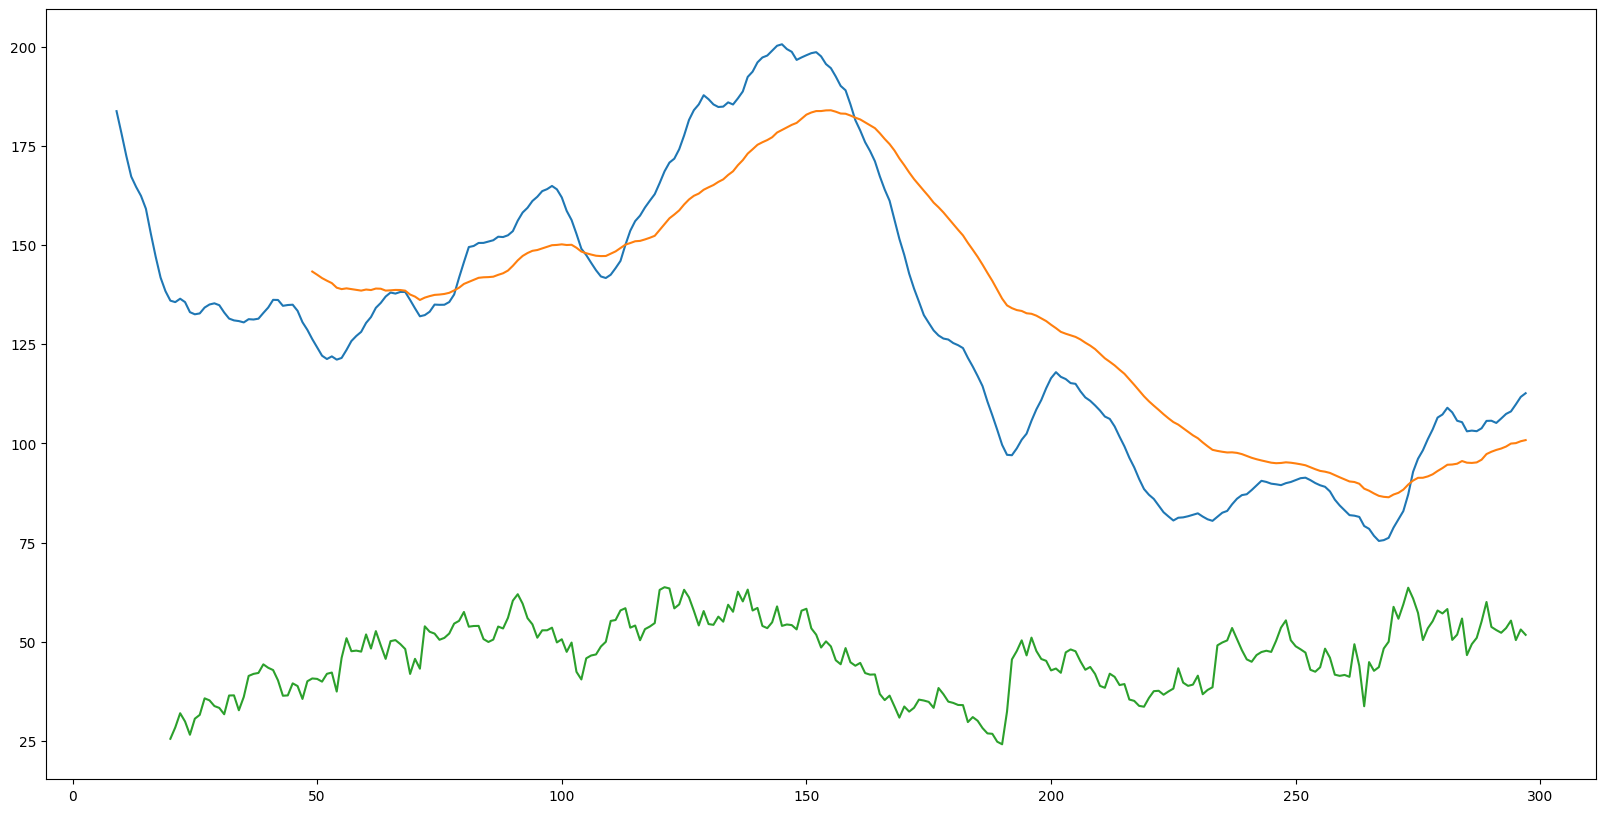

In [86]:
#data['SMA-10'] = data['close'].rolling(window=10).mean()
#data['EMA-50'] = data['close'].ewm(span=50, adjust=False).mean()
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 10))

plt.plot(data['SMA-10'], label="SMA for 10 days")
plt.plot(data['EMA-50'], label="EMA for 50 days")
plt.plot(data['RSI'],label="RSI")
#include an indication line - overbought > 70, oversold<30 

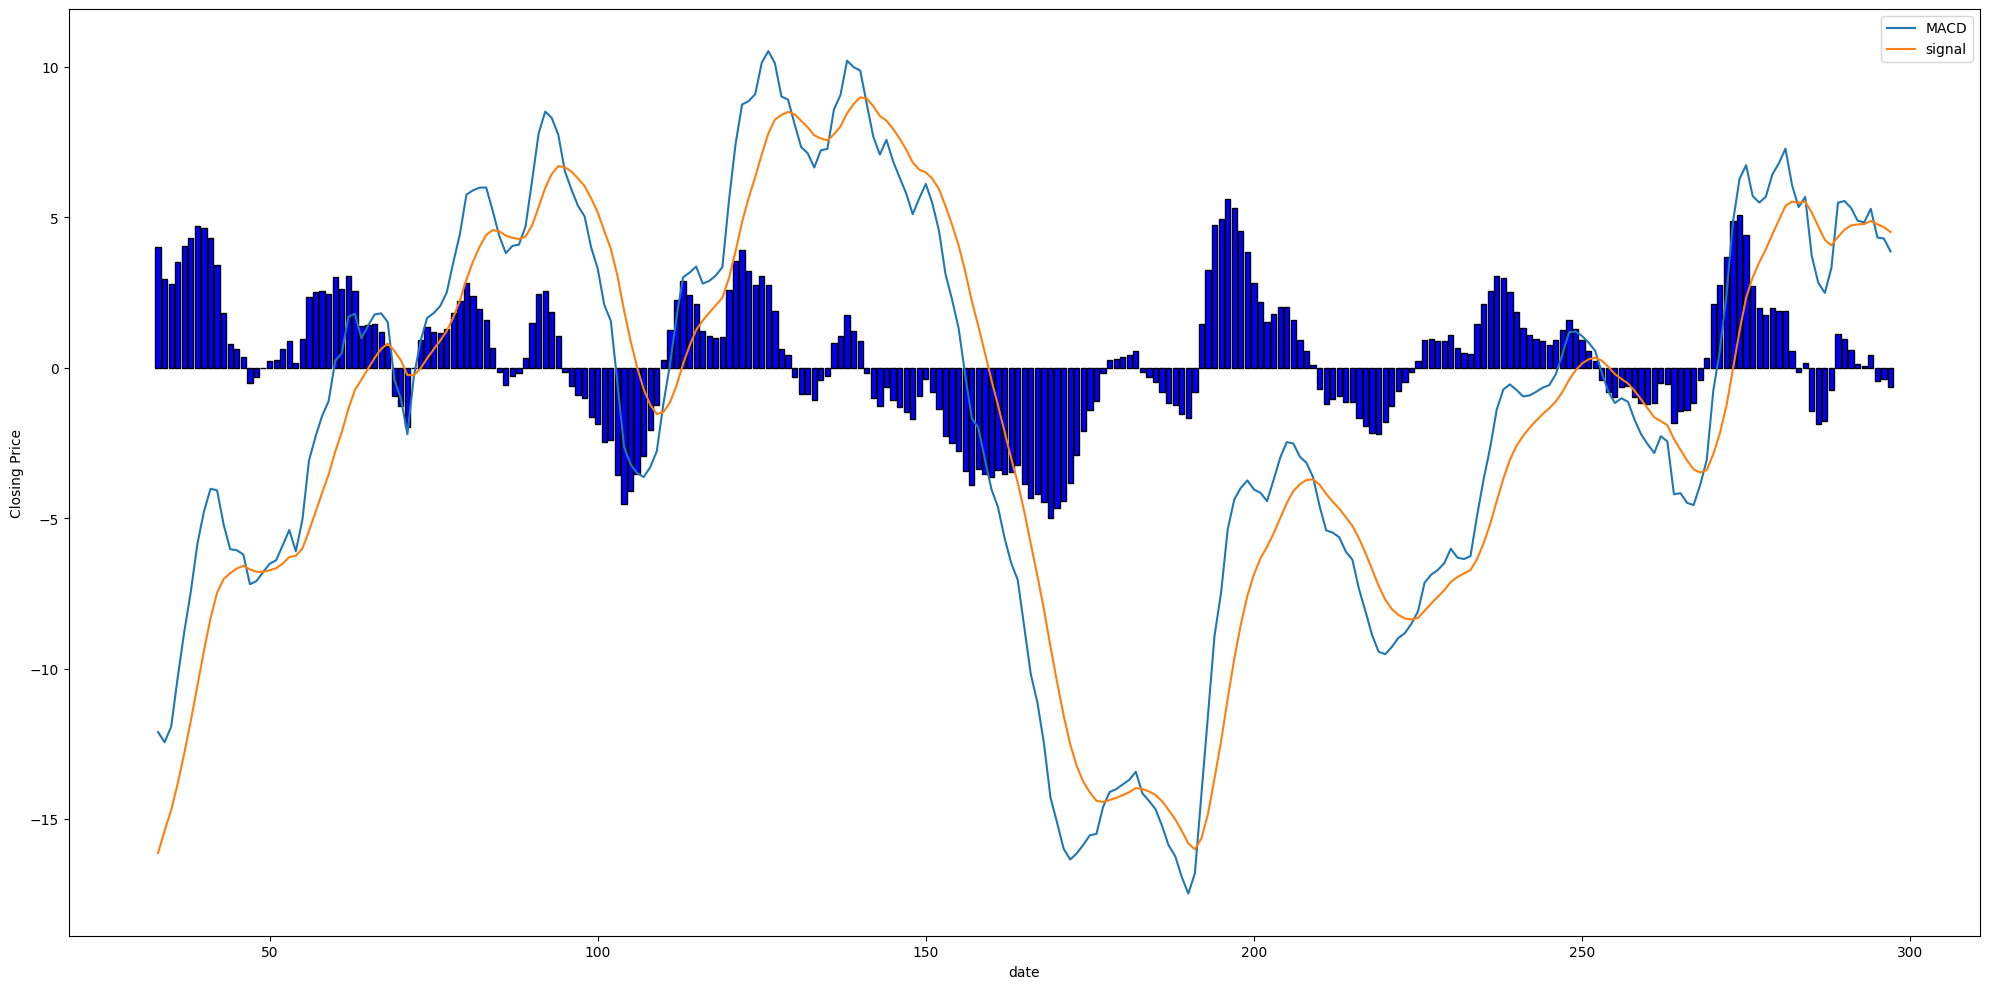

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#MACD
plt.plot(data['MACD_12_26_9'], label="MACD") #diff bet 2 emas 
plt.plot(data['MACDs_12_26_9'], label="signal") #signal line 
plt.bar(data.index, data['MACDh_12_26_9'], color='blue', edgecolor='black')

plt.ylabel('Closing Price')
plt.xlabel("date")
plt.legend()
plt.tight_layout()

In [89]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('Data/monthly_IBM.csv')
print(data.head(50))

     timestamp    open      high       low   close     volume
0   2024-09-17  201.91  218.8400  199.3350  214.13   44850079
1   2024-08-30  192.81  202.1700  181.8100  202.13   65453729
2   2024-07-31  173.45  196.2600  173.3800  192.14   81258646
3   2024-06-28  166.54  178.4599  163.5300  172.95   70706301
4   2024-05-31  165.69  175.4600  162.6200  166.85   78620355
5   2024-04-30  190.00  193.2800  165.2605  166.20   98297181
6   2024-03-28  185.49  199.1800  185.1800  190.96   99921776
7   2024-02-29  183.63  188.9500  178.7500  185.03   88679550
8   2024-01-31  162.83  196.9000  157.8850  183.66  128121557
9   2023-12-29  158.41  166.3400  158.0000  163.55   87358302
10  2023-11-30  145.00  158.6000  144.4500  158.56   78460252
11  2023-10-31  140.04  144.7600  135.8700  144.64   94386980
12  2023-09-29  147.26  151.9299  139.6100  140.30   82806487
13  2023-08-31  144.25  147.7275  139.7600  146.83   84274205
14  2023-07-31  133.42  144.6050  131.5500  144.18   85778938
15  2023

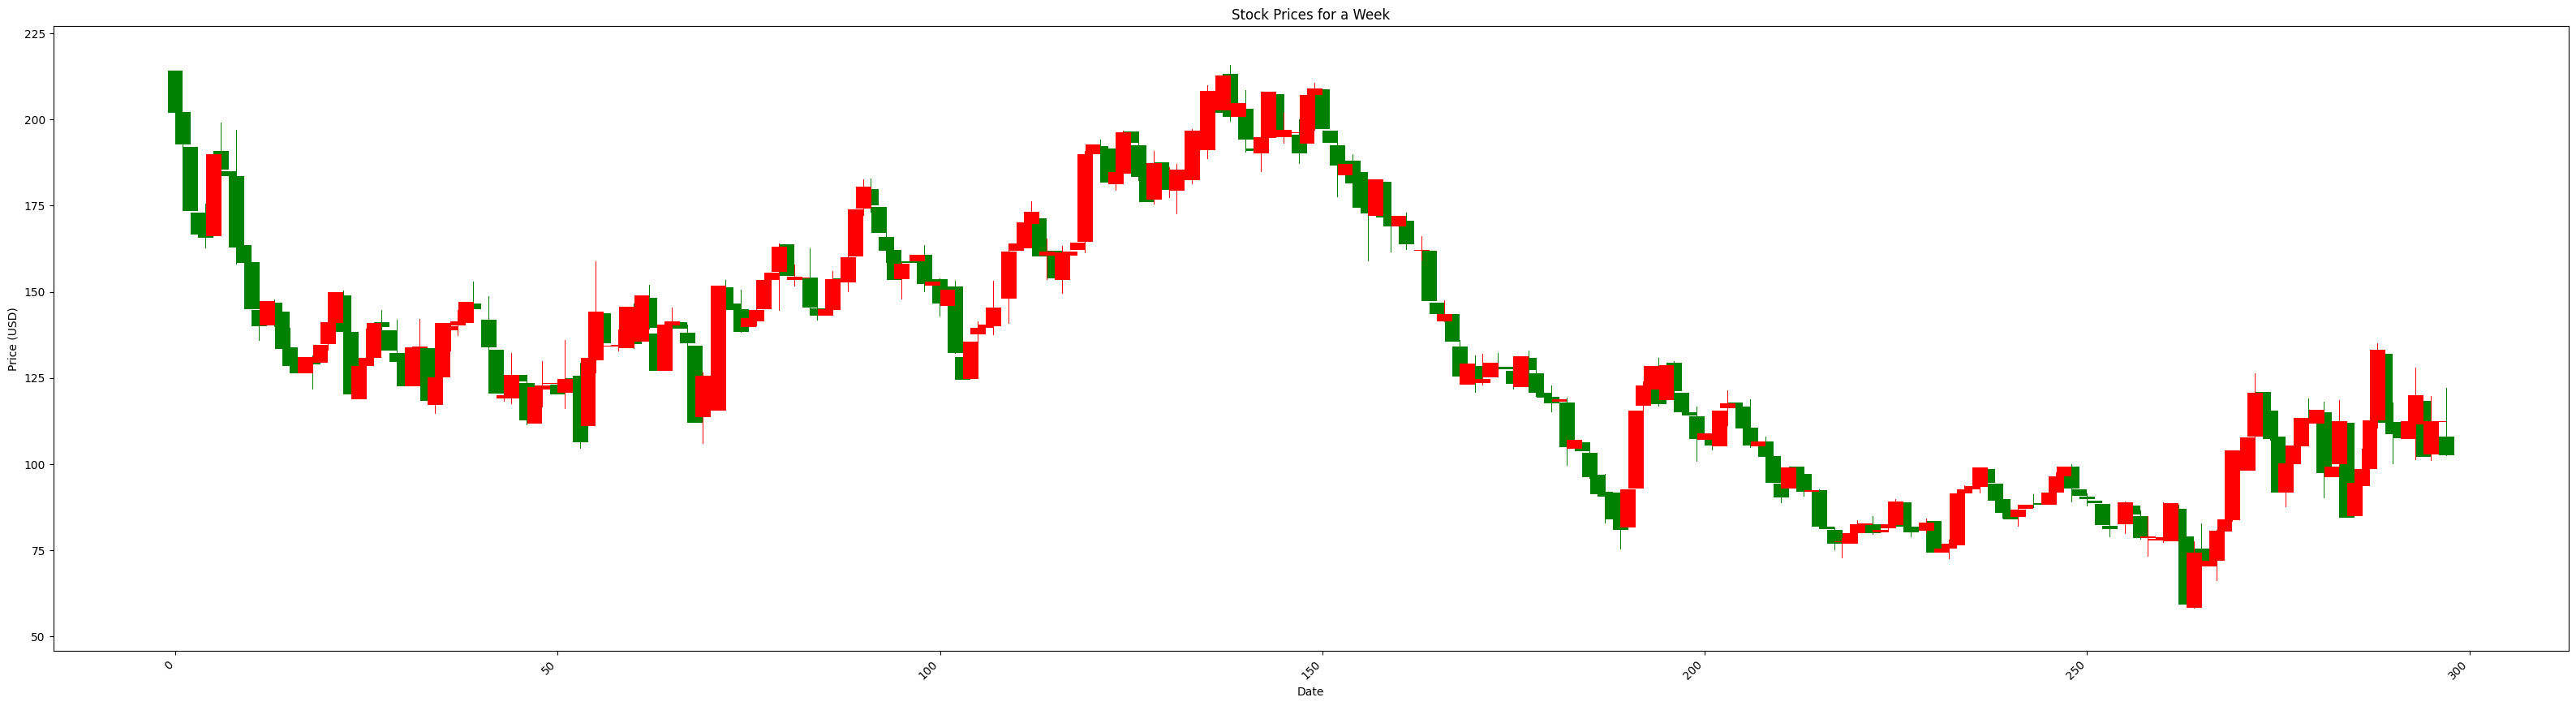

In [92]:
#create figure
plt.figure(figsize=(40, 10))
# Set the width of candlestick elements
width = 2
width2 = 0.05

data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create a new DataFrame called "up" that stores the stock_prices
# when the closing stock price is greater than or equal to the opening stock price
up = data[data['close'] >= data['open']]

# Create a new DataFrame called "down" that stores the stock_prices
# when the closing stock price is lesser than the opening stock price
down = data[data['close'] < data['open']]

# When the stock prices have decreased, then it
# will be represented by red color candlestick
col1 = 'red'

# When the stock prices have increased, then it
# will be represented by green color candlestick
col2 = 'green'

# Plot the up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col2)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col2)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col2)

# Plot the down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col1)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col1)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col1)

# Rotate the x-axis tick labels at 45 degrees towards right
plt.xticks(rotation=45, ha='right')

# Display the candlestick chart of stock data for a week
plt.title('Stock Prices for a Week')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

#need to do sth about the dates..
#dun u find it weird that the green portion is declining??

In [ ]:
#to include the macd and some trend indicator in ur graph 